# KNN no `chb09_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb09_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.888889,0.962963,0.962963,0.975309,0.938272,0.962963,0.975309,0.962963,0.975309,0.975309,0.962963,0.962963,0.913580,0.950617,0.987654,0.962963,0.962963,0.975309
1,0.950617,0.975309,0.975309,0.950617,0.962963,0.962963,0.975309,0.950617,0.987654,0.987654,0.975309,1.000000,0.938272,0.962963,0.975309,0.975309,0.975309,0.987654
2,0.938272,0.975309,0.987654,0.975309,0.962963,0.975309,0.975309,0.975309,1.000000,1.000000,0.962963,0.962963,0.938272,0.975309,1.000000,0.975309,0.987654,0.987654
3,0.901235,0.975309,0.987654,0.975309,0.962963,0.962963,0.975309,0.950617,0.987654,0.987654,0.962963,0.975309,0.950617,0.975309,0.987654,0.975309,0.987654,0.987654
4,0.925926,0.962963,0.975309,0.975309,0.925926,0.962963,0.987654,0.950617,0.975309,0.975309,0.962963,0.987654,0.925926,0.975309,0.987654,0.962963,0.975309,0.975309
5,0.925926,0.938272,0.975309,0.950617,0.925926,0.950617,0.975309,0.975309,0.962963,0.938272,0.925926,0.962963,0.901235,0.925926,0.987654,0.950617,0.962963,0.975309
6,0.888889,0.925926,0.975309,0.962963,0.925926,0.962963,0.975309,0.975309,0.975309,0.975309,0.938272,0.987654,0.938272,0.925926,0.987654,0.950617,0.962963,0.987654
7,0.901235,0.987654,0.962963,0.962963,0.950617,0.975309,0.975309,0.962963,1.000000,1.000000,0.962963,0.962963,0.962963,0.975309,0.975309,0.987654,0.987654,0.975309
8,0.962963,0.975309,0.987654,0.975309,0.962963,0.962963,0.962963,0.962963,0.975309,0.987654,0.962963,0.975309,0.938272,0.962963,0.975309,0.962963,0.975309,0.975309
9,0.938272,0.987654,1.000000,0.987654,0.975309,1.000000,0.987654,0.987654,1.000000,1.000000,0.975309,0.975309,0.938272,0.987654,1.000000,0.975309,1.000000,0.987654


,count,mean,std,min,25%,50%,75%,max
9,20.0,0.985185,0.014218,0.938272,0.975309,0.987654,0.990741,1.000000
14,20.0,0.984568,0.010502,0.962963,0.975309,0.987654,0.987654,1.000000
8,20.0,0.980864,0.014703,0.950617,0.975309,0.981481,0.987654,1.000000
17,20.0,0.976543,0.013224,0.950617,0.972222,0.975309,0.987654,1.000000
2,20.0,0.976543,0.014933,0.950617,0.972222,0.975309,0.987654,1.000000
16,20.0,0.973457,0.016159,0.938272,0.962963,0.975309,0.987654,1.000000
6,20.0,0.971605,0.016072,0.925926,0.962963,0.975309,0.975309,1.000000
11,20.0,0.971605,0.013345,0.938272,0.962963,0.975309,0.975309,1.000000
5,20.0,0.968519,0.013568,0.938272,0.962963,0.962963,0.975309,1.000000
3,20.0,0.966049,0.011933,0.950617,0.959877,0.962963,0.975309,0.987654


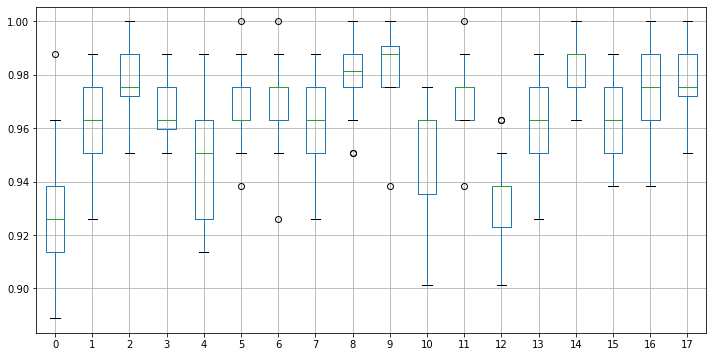

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '09'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.927160,0.023663,0.925926,09,0
1,0.961111,0.020137,0.962963,09,1
2,0.976543,0.014933,0.975309,09,2
3,0.966049,0.011933,0.962963,09,3
4,0.947531,0.020375,0.950617,09,4
5,0.968519,0.013568,0.962963,09,5
6,0.971605,0.016072,0.975309,09,6
7,0.959877,0.015448,0.962963,09,7
8,0.980864,0.014703,0.981481,09,8
9,0.985185,0.014218,0.987654,09,9
